### Importing necessary functionalities and modules 
We will keep importing on the fly as needed

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [44]:
catalyst_features = pd.read_excel('features.xlsx')
catalyst_features.replace([np.inf, -np.inf], np.nan, inplace=True)
catalyst_features.head()

,"Co, %","dCo, nm","BET, m^2/g","Pt,Au,Ru %","Ceol, %","Carbon, %","SiO2, %","Al2O3, %","TiO2, %","SiC, %","Other, %","T, K",P Мpa,H2/CO,"GHSV, L*h-1*g-1","m(cat), g"
0,13.0,15.7,173.0,0.2,0.0,0.0,0.0,84.0,0.0,0,3.0,493,2.4,2.0,2.0,3.0
1,13.0,14.2,169.0,0.2,0.0,0.0,5.0,79.0,0.0,0,3.0,493,2.4,2.0,2.0,3.0
2,13.0,15.0,164.0,0.2,0.0,0.0,10.0,74.0,0.0,0,3.0,493,2.4,2.0,2.0,3.0
3,13.0,18.7,161.0,0.2,0.0,0.0,15.0,69.0,0.0,0,3.0,493,2.4,2.0,2.0,3.0
4,10.0,12.7,763.0,0.0,0.0,0.0,90.0,0.0,0.0,0,0.0,493,2.0,2.0,2.0,2.5


In [45]:
catalyst_properties = pd.read_excel('properties.xlsx')
catalyst_properties.replace([np.inf, -np.inf], np.nan, inplace=True)
catalyst_properties.head()

,CO(conv),CH4,CO2,C2-C4,С5+,Mult
0,54.0,20.9,2.6,3.4,73.1,39.46860
1,71.0,24.0,2.3,3.4,70.3,49.92720
2,78.0,19.3,1.2,5.0,74.5,58.13340
3,57.0,22.3,0.9,4.5,72.4,41.23950
4,27.3,8.6,0.6,8.4,82.4,22.50629


In [46]:
print(catalyst_features.info())
print(catalyst_properties.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Co, %            169 non-null    float64
 1   dCo, nm          169 non-null    float64
 2   BET, m^2/g       169 non-null    float64
 3   Pt,Au,Ru %       169 non-null    float64
 4   Ceol, %          169 non-null    float64
 5   Carbon, %        169 non-null    float64
 6   SiO2, %          169 non-null    float64
 7   Al2O3, %         169 non-null    float64
 8   TiO2, %          169 non-null    float64
 9   SiC, %           169 non-null    int64  
 10  Other, %         169 non-null    float64
 11  T, K             169 non-null    int64  
 12  P Мpa            169 non-null    float64
 13  H2/CO            169 non-null    float64
 14  GHSV, L*h-1*g-1  169 non-null    float64
 15  m(cat), g        169 non-null    float64
dtypes: float64(14), int64(2)
memory usage: 21.2 KB
None
<class 'pa

In [55]:
for i, col in enumerate(catalyst_properties.columns):
    if col=='Mult':
        print(i, type(col))

5 <class 'str'>


__DATA ANALYSIS USING PLOTS__

lets see the correlation between the features and properties of the catalyst.<br>
combining the two dataframes first

In [12]:
data = pd.concat([catalyst_features, catalyst_properties], axis=1)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Co, %            169 non-null    float64
 1   dCo, nm          169 non-null    float64
 2   BET, m^2/g       169 non-null    float64
 3   Pt,Au,Ru %       169 non-null    float64
 4   Ceol, %          169 non-null    float64
 5   Carbon, %        169 non-null    float64
 6   SiO2, %          169 non-null    float64
 7   Al2O3, %         169 non-null    float64
 8   TiO2, %          169 non-null    float64
 9   SiC, %           169 non-null    int64  
 10  Other, %         169 non-null    float64
 11  T, K             169 non-null    int64  
 12  P Мpa            169 non-null    float64
 13  H2/CO            169 non-null    float64
 14  GHSV, L*h-1*g-1  169 non-null    float64
 15  m(cat), g        169 non-null    float64
 16  CO(conv)         169 non-null    float64
 17  CH4             

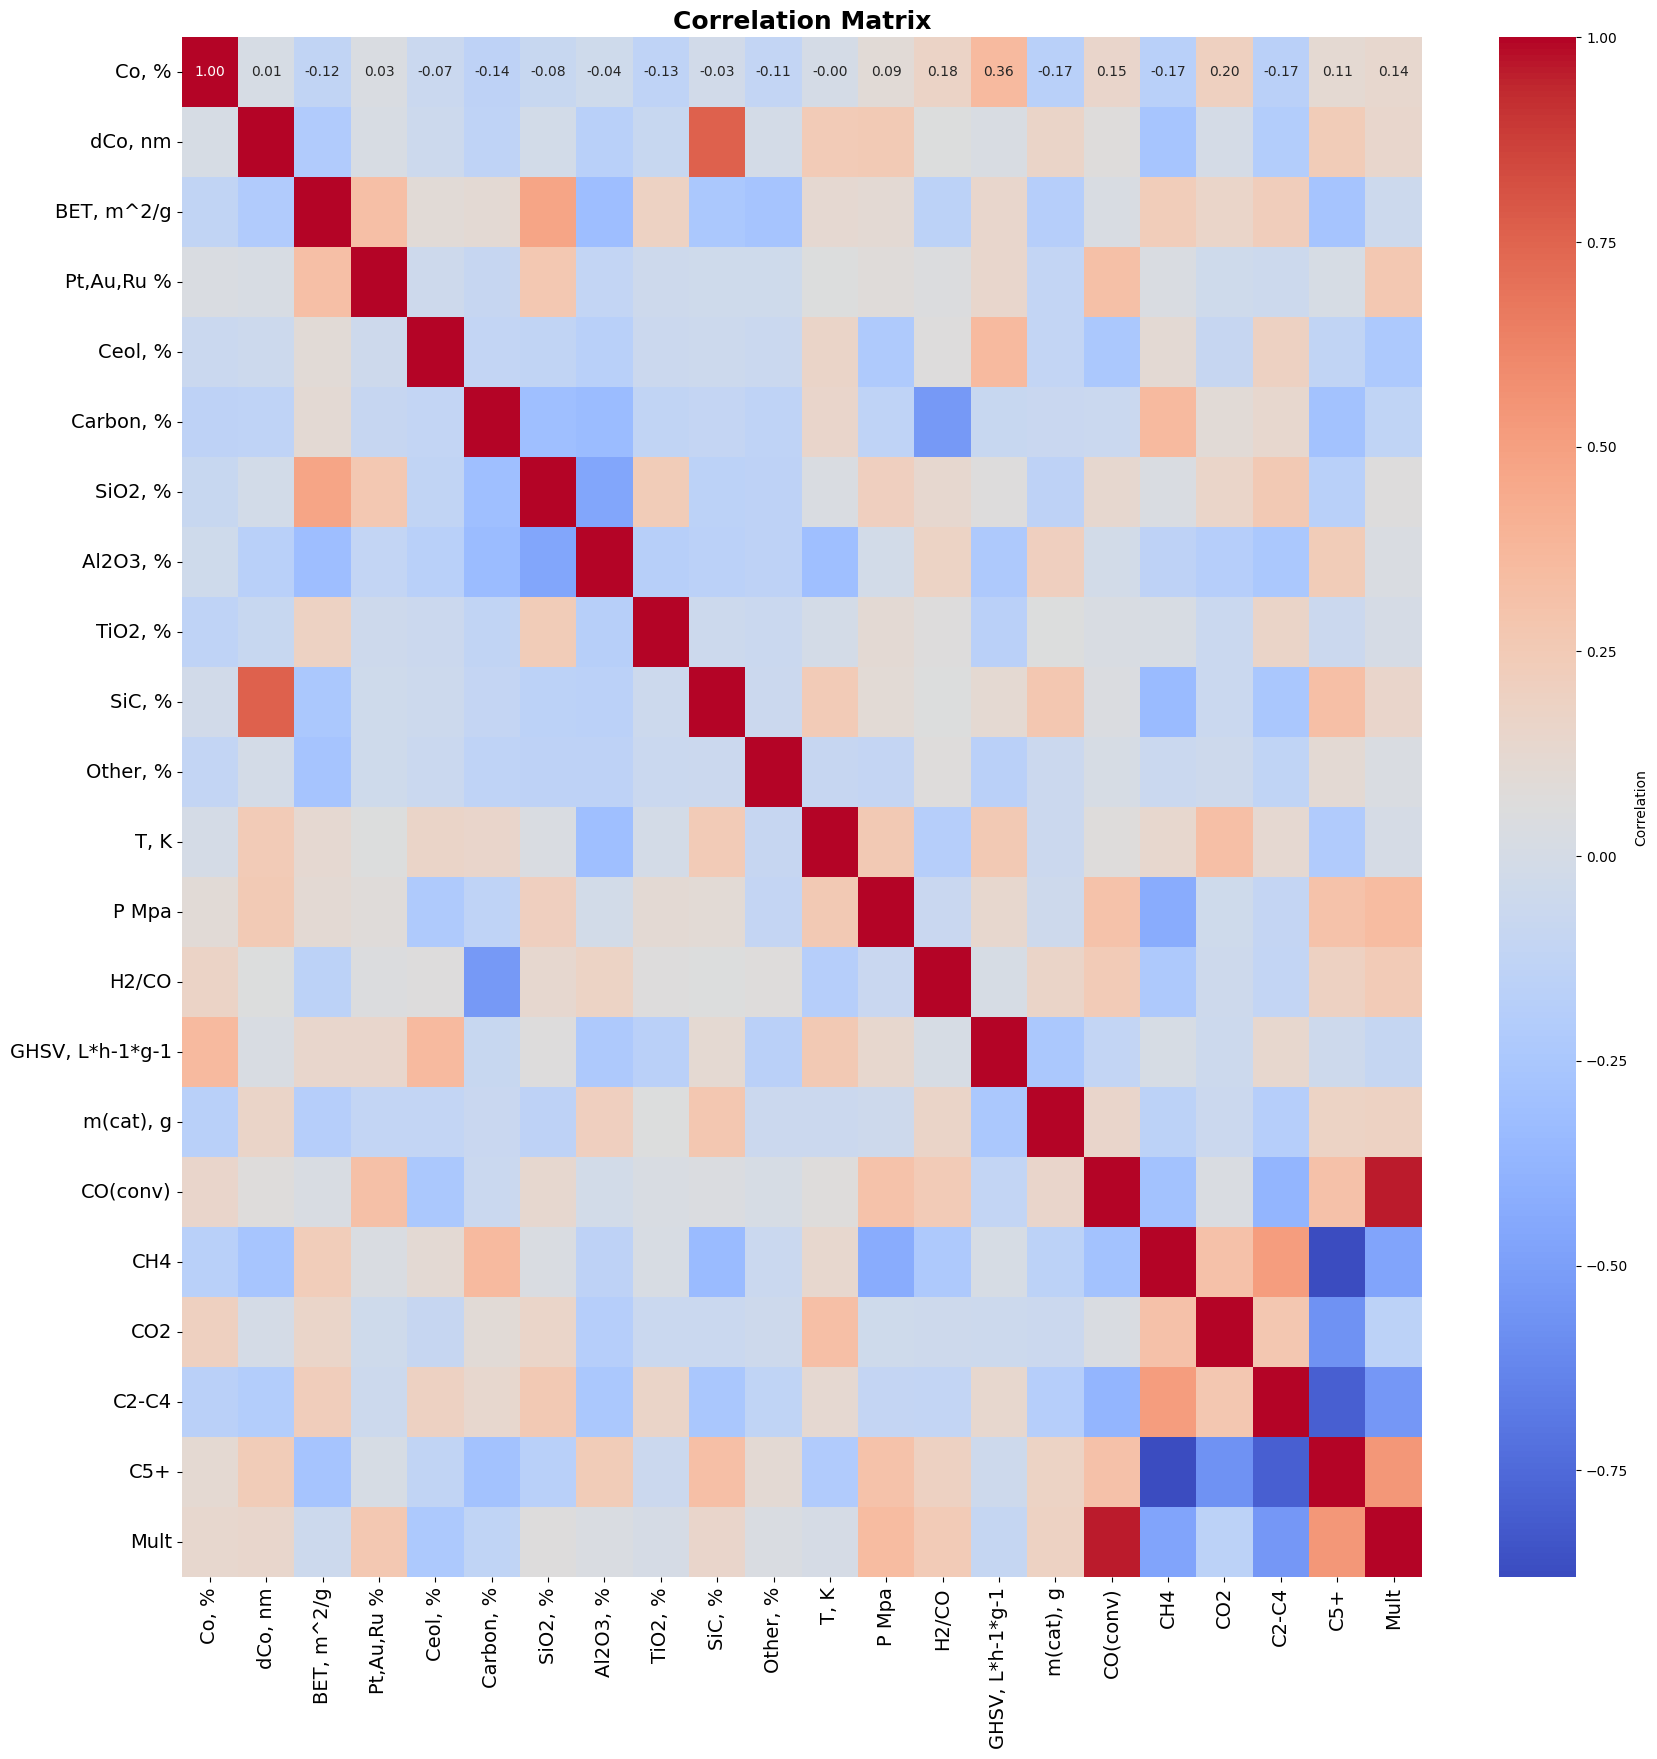

In [18]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Correlation'})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Correlation Matrix", fontsize=18, weight='bold')
plt.savefig('correlation heatmap.png')
plt.show()

Co, % 0
dCo, nm 1
BET, m^2/g 2
Pt,Au,Ru % 3
Ceol, % 4
Carbon, % 5
SiO2, % 6


C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

Al2O3, % 7
TiO2, % 8
SiC, % 9
Other, % 10


C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

T, K 11
P Мpa 12
H2/CO 13
GHSV, L*h-1*g-1 14
m(cat), g 15


C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

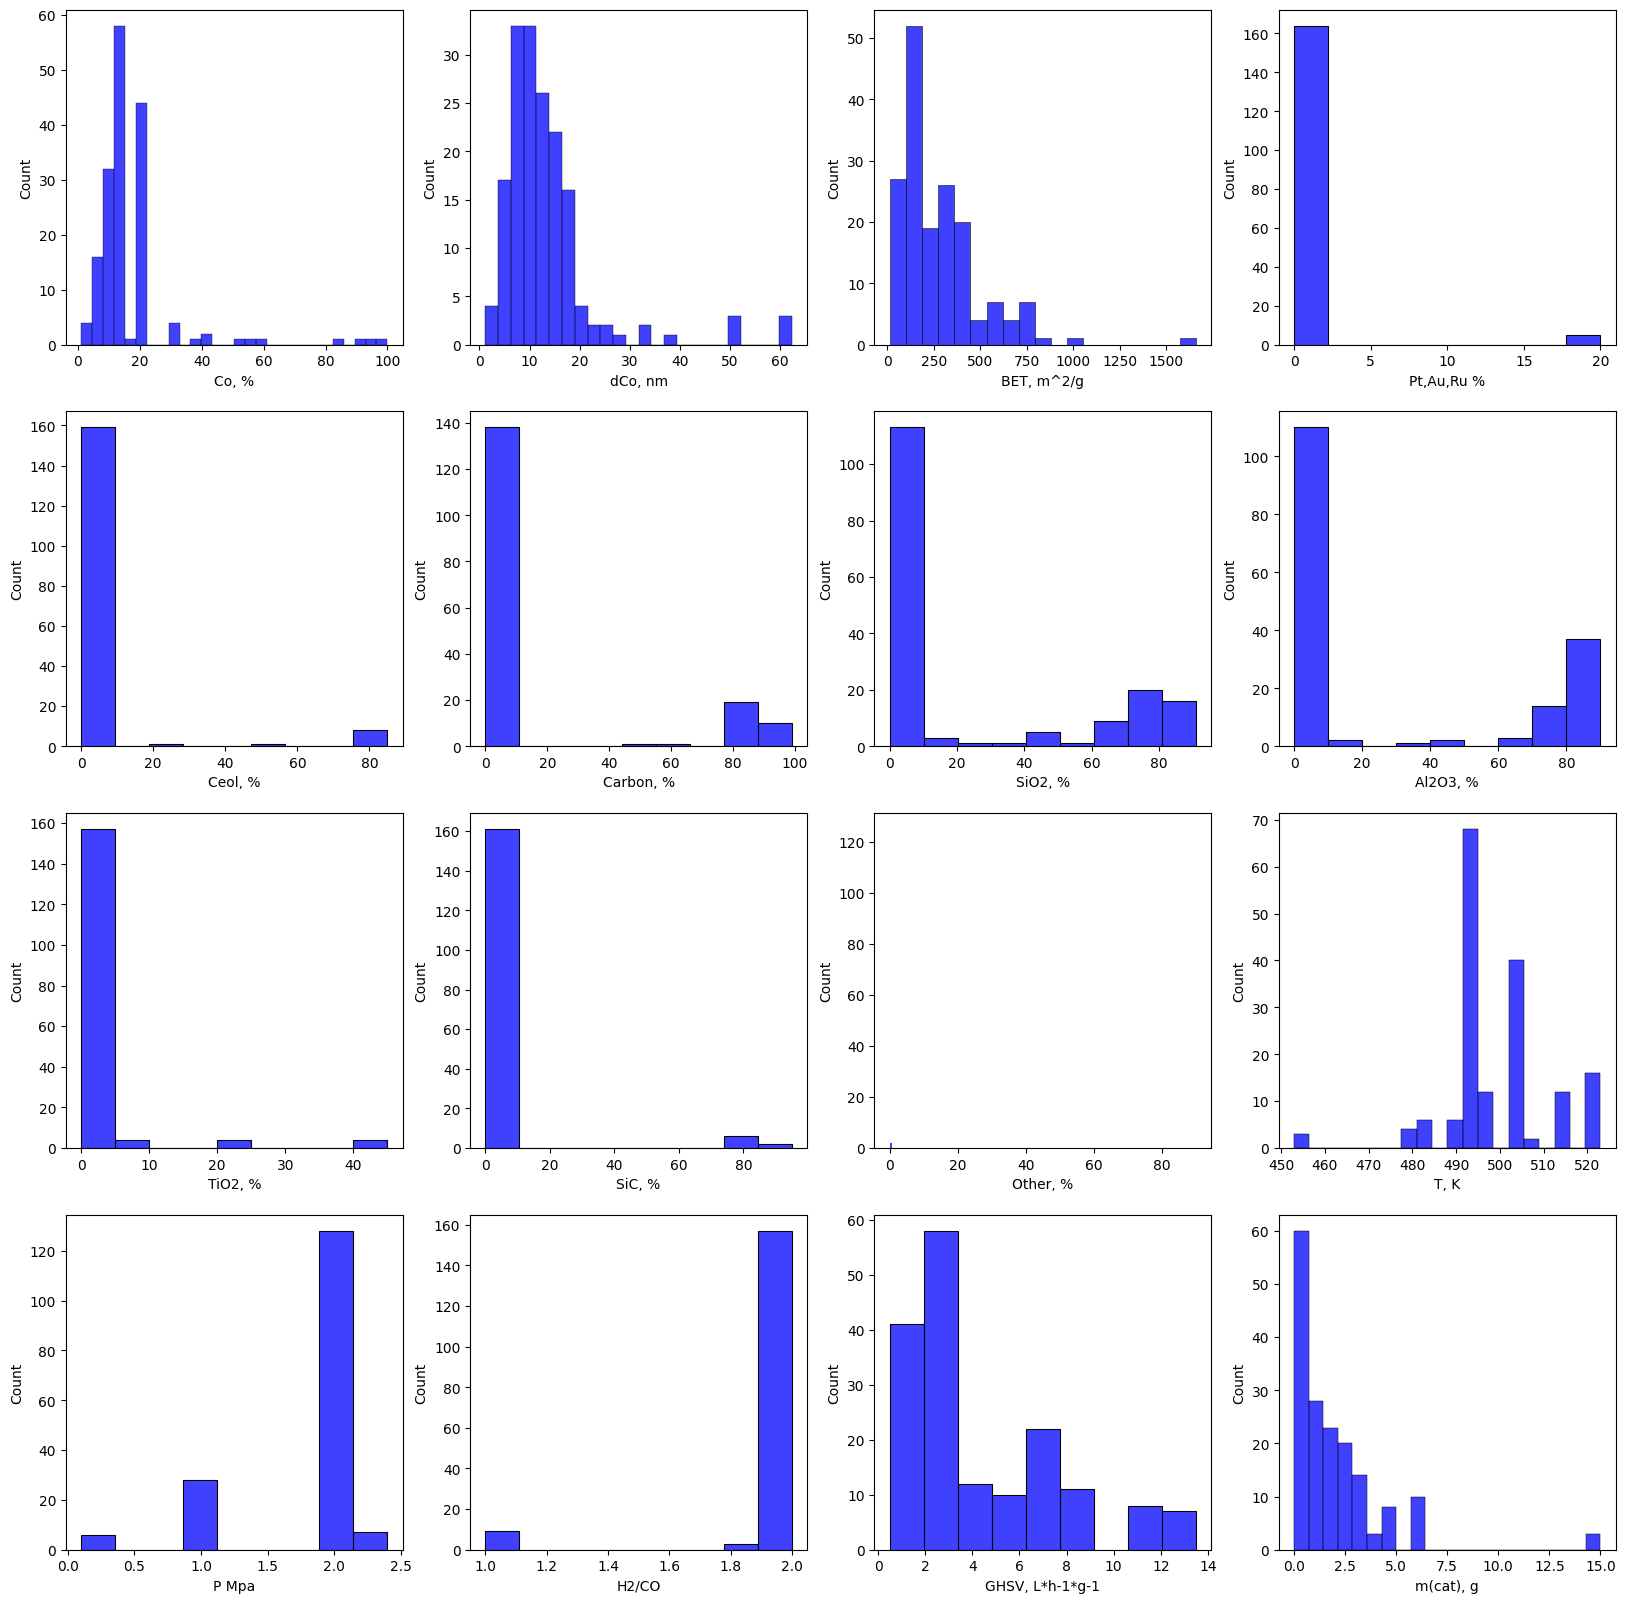

In [23]:
fig, ax = plt.subplots(4,4)
for i, col in enumerate(catalyst_features.columns[:]):
#     if col!='status':
    print(col, i)
    plt.subplot(4,4,i+1)
    sns.histplot(catalyst_features[col], color='blue')
#     ax.title(weight='bold')
#     plt.xticks(fontsize=12)
#     sns.histplot(data[col], color='red', label='Diagnosed')
#     if i == 1:
#         plt.legend(loc='upper right')
#     else:
#         plt.legend().remove()
fig.set_size_inches((20,20))
plt.savefig('Features histogram.png')


CO(conv) 0
CH4 1
CO2 2


C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


C2-C4 3
С5+ 4


C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Mult 5


C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


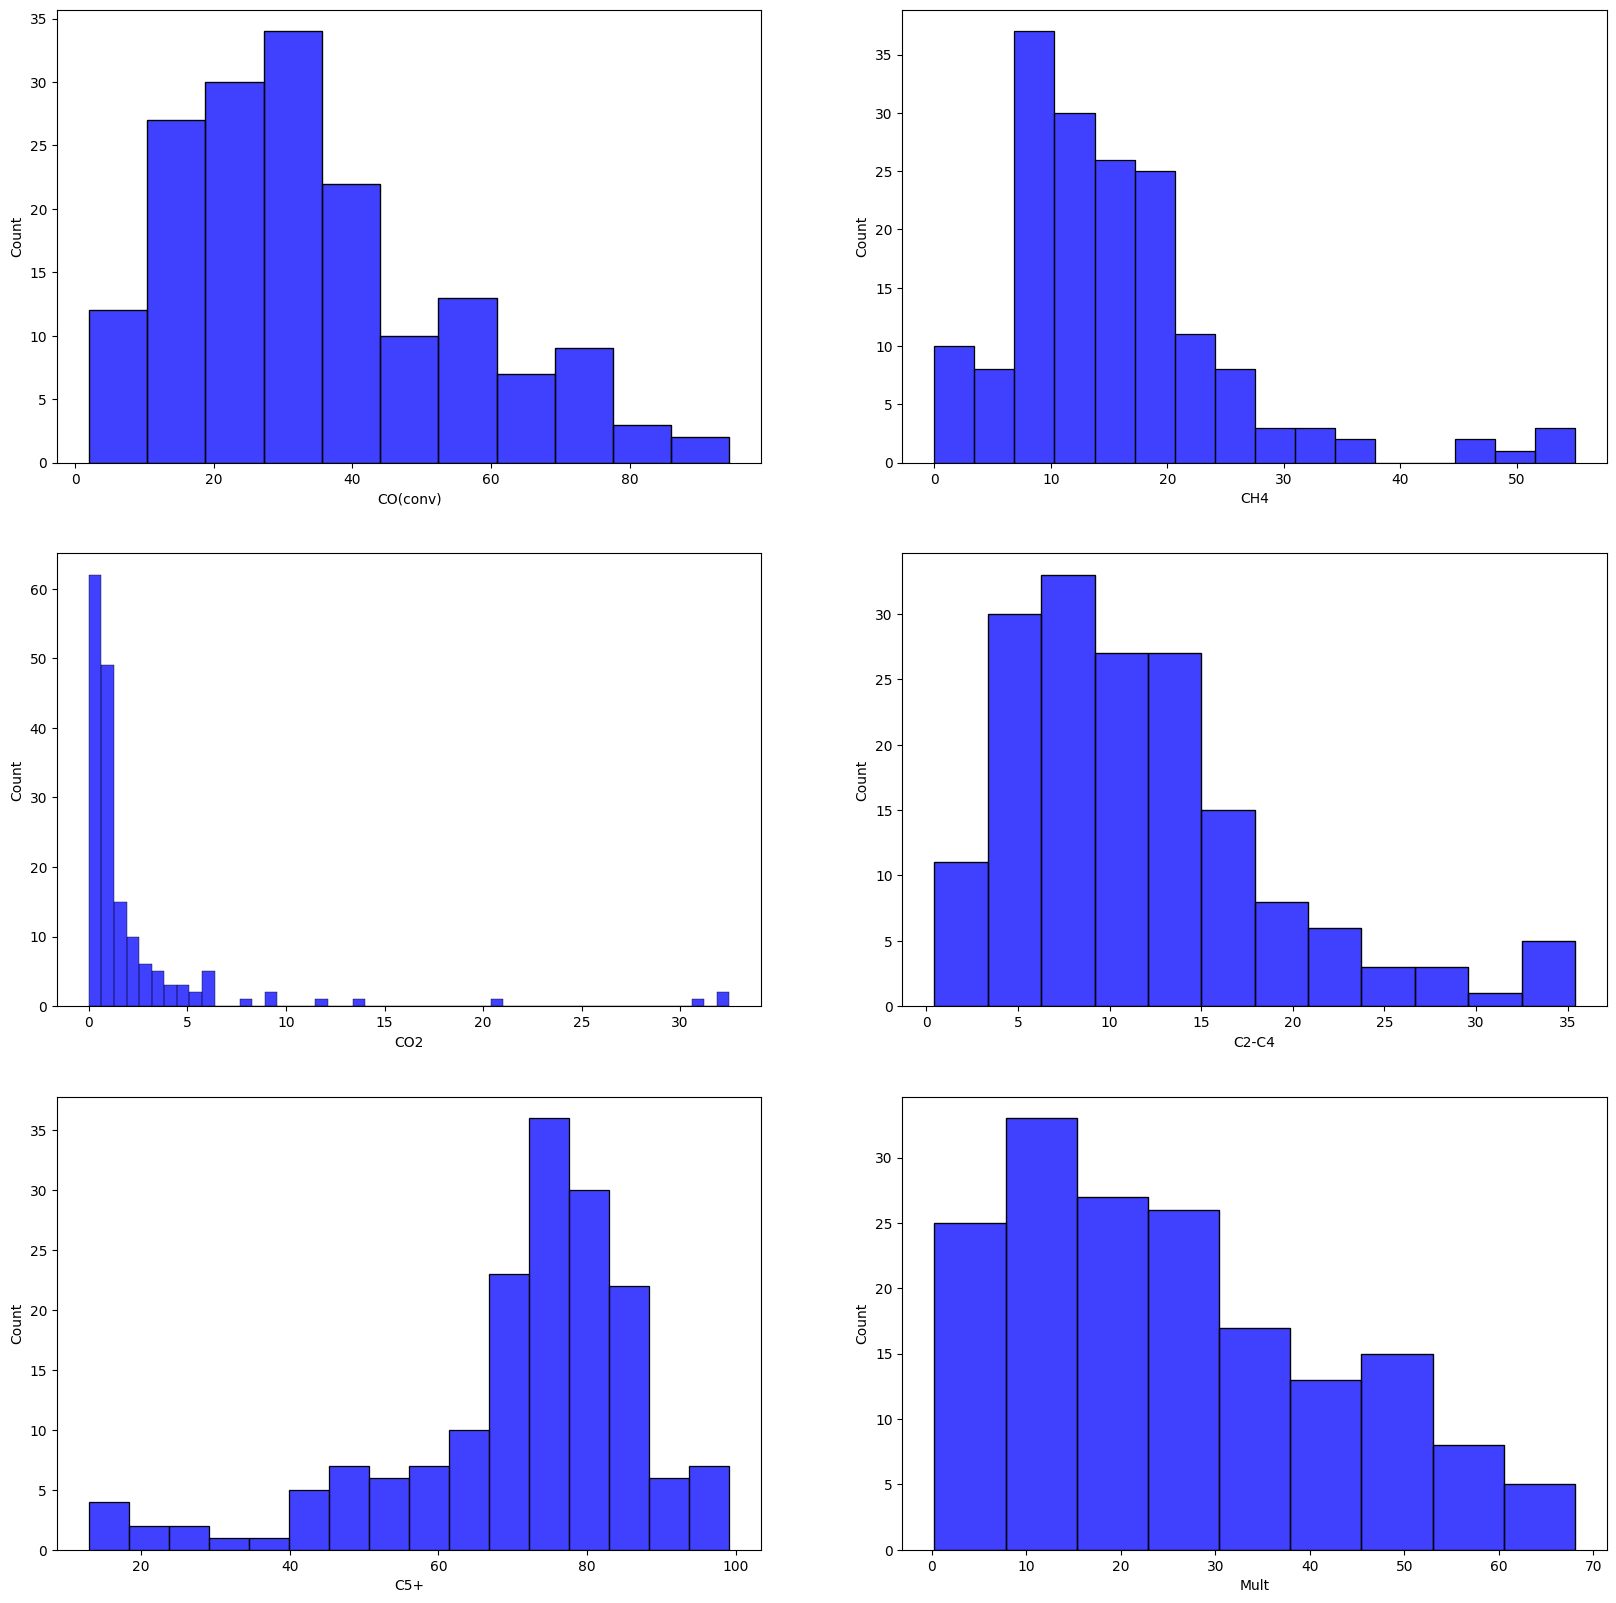

In [25]:
fig, ax = plt.subplots(3,2)
for i, col in enumerate(catalyst_properties.columns[:]):
#     if col!='status':
    print(col, i)
    plt.subplot(3,2,i+1)
    sns.histplot(catalyst_properties[col], color='blue')
#     ax.title(weight='bold')
#     plt.xticks(fontsize=12)
#     sns.histplot(data[col], color='red', label='Diagnosed')
#     if i == 1:
#         plt.legend(loc='upper right')
#     else:
#         plt.legend().remove()
fig.set_size_inches((20,20))
plt.savefig('Properties histogram.png')


## __DATA PREPROCESSING AND MODEL BUILDING__

In [80]:
X = catalyst_features
y = catalyst_properties
print(y.shape)

(169, 6)


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

#### Lets import all possible regression models and create their corresponding objects. The idea is that we will first test all the models to see which one preforms the best. Once we have done that, we can start tuning the hyperparameters for the top 3 models using the Cross-Validation techinque.

In [76]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score, cross_validate
from xgboost import XGBRegressor

In [77]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
bayesianreg = BayesianRidge()
dtreg = DecisionTreeRegressor()
rfreg = RandomForestRegressor()
gbreg = GradientBoostingRegressor()
xgbreg = XGBRegressor()
svr = SVR()
knnreg = KNeighborsRegressor()
kernelreg = KernelRidge()

__Training all the model with default parameters and observing which one of them performs the best on the test set__

In [78]:
model_dict = {'Linear_Regression': lr, 'Ridge': ridge, 'Lasso': lasso, 'Decision tree': dtreg, 
              'Random Forest': rfreg, 'XGB regressor': xgbreg, 'KNN': knnreg, 
              'Kernel Ridge': kernelreg, 'Bayesian Ridge': bayesianreg}


In [79]:
model_list = list(model_dict.keys())
mae_scores = []
mse_scores = []
rmse_scores =[]
r2_scores = []
scorer = {'MAE': make_scorer(mean_absolute_error), 'MSE': make_scorer(mean_squared_error), 'RMSE': 'neg_root_mean_squared_error',
         'R2': make_scorer(r2_score)}
kf = KFold(n_splits=10, shuffle=True, random_state=42)
for key, model in model_dict.items():
    print(key)
    scores = []
    # Generate cross-validated predictions
    cv_scores = cross_validate(model, X_train, y_train, cv=kf, scoring=scorer)
    
    mae_scores.append(np.mean(cv_scores['test_MAE']))

    mse_scores.append(np.mean(cv_scores['test_MSE']))

    rmse_scores.append(np.mean(cv_scores['test_RMSE']))

    r2_scores.append(np.mean(cv_scores['test_R2']))

    

model_performance = {'Model': model_list, 'MAE': mae_scores, 'MSE': mse_scores, 'RMSE':rmse_scores, 'R2': r2_scores}

Linear_Regression
Ridge
Lasso


C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.022e+01, tolerance: 4.797e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.145e+01, tolerance: 3.546e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Decision tree
Random Forest
XGB regressor
KNN
Kernel Ridge
Bayesian Ridge


ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_bayes.py", line 295, in fit
    X, y = self._validate_data(X, y, dtype=[np.float64, np.float32], y_numeric=True)
  File "C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1208, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
  File "C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1229, in _check_y
    y = column_or_1d(y, warn=True)
  File "C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1296, in column_or_1d
    raise ValueError(
ValueError: y should be a 1d array, got an array of shape (121, 6) instead.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_bayes.py", line 295, in fit
    X, y = self._validate_data(X, y, dtype=[np.float64, np.float32], y_numeric=True)
  File "C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1208, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
  File "C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1229, in _check_y
    y = column_or_1d(y, warn=True)
  File "C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1296, in column_or_1d
    raise ValueError(
ValueError: y should be a 1d array, got an array of shape (122, 6) instead.


In [73]:
model_performance = pd.DataFrame(model_performance).sort_values(by='R2', ascending=False)
model_performance

,Model,MAE,MSE,RMSE,R2
5,XGB regressor,8.515806,160.079484,-12.396657,0.292429
4,Random Forest,9.165275,176.459532,-12.907029,0.170337
7,Kernel Ridge,12.460298,247.728968,-15.436547,-0.011990
0,Linear_Regression,12.556680,248.754507,-15.425257,-0.045487
1,Ridge,12.598969,250.346572,-15.467964,-0.048732
6,KNN,11.447010,239.787789,-15.078293,-0.102060
3,Decision tree,10.849722,266.348750,-16.022251,-0.110745
2,Lasso,13.128539,277.464510,-16.393826,-0.189976
8,Bayesian Ridge,14.766052,312.421140,-17.576540,-0.321639


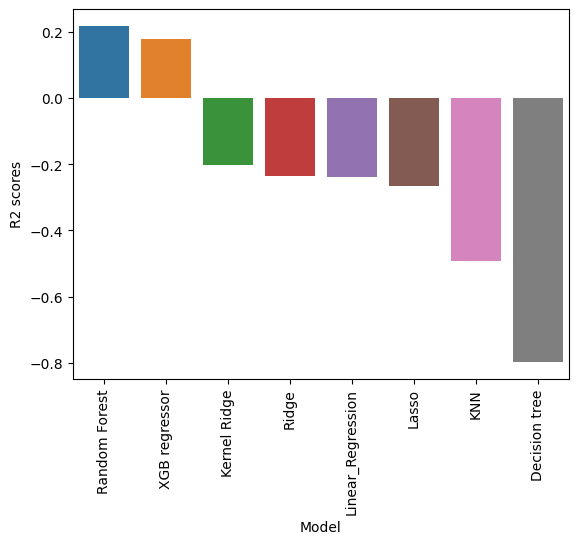

In [41]:
fig = plt.figure()
sns.barplot(x="Model", y='R2',data=model_performance)
plt.xlabel('Model')
plt.ylabel('R2 scores')
# plt.legend()
plt.xticks(rotation=90)
plt.show()
fig.clear()

#### The regression models don't seem to work well so far. Based on the above plot, ___Gradient Boost regressor___ works the best until now. 
#### But lets try polynomial regression rather than the linear one. This can done by obtaining __polynomial features__ (feature engineering) and then training the model on that transformed data.

In [23]:
model_dict = {'Linear_Regression': lr, 'Ridge': ridge, 'Bayesian Ridge': bayesianreg, 'KNN': knnreg, 
              'Kernel Ridge': kernelreg, 'Gradient Boost': gbreg}

In [159]:
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
model_list = list(model_dict.keys())
mae_scores = []
mse_scores = []
rmse_scores =[]
r2_scores = []

for key, model in model_dict.items():
    print(key)
    scores = []
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    
    # MAE
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)
#     print(f'Mean Absolute Error: {mae}')

    # MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
#     print(f'Mean Squared Error: {mse}')

    # RMSE
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)
#     print(f'Root Mean Squared Error: {rmse}')

    # R² Score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
#     model_performance[key] = scores
#     print(f'R² Score: {r2}')
    

model_performance = {'Model': model_list, 'MAE': mae_scores, 'MSE': mse_scores, 'RMSE':rmse_scores, 'R2': r2_scores}

Linear_Regression
Ridge
Bayesian Ridge


C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.03892e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


KNN
Kernel Ridge


C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Gradient Boost


In [160]:
model_performance = pd.DataFrame(model_performance)
model_performance

,Model,MAE,MSE,RMSE,R2
0,Linear_Regression,811.425585,1.333705e+06,1154.861602,0.568425
1,Ridge,809.946775,1.332284e+06,1154.246034,0.568885
2,Bayesian Ridge,825.468594,1.337745e+06,1156.609078,0.567118
3,KNN,854.917112,1.511062e+06,1229.252694,0.511034
4,Kernel Ridge,871.949345,1.416582e+06,1190.202369,0.541607
5,Gradient Boost,809.559440,1.341318e+06,1158.152739,0.565962


### Okay, we got some improvement with polynomial features, but still quite poor. So based on degree 1 polynomial fit, lets select Ridge regression, Bayesian Ridge, and Gradient Boost regression. Tuning their model parameters using CV techinique might help with the performance. 

### ___Gradient Boost___

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [2, 10, 20], 'learning_rate': [0.1, 0.5, 1]}
grid_search = GridSearchCV(GradientBoostingRegressor(verbose=1), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best parameters: ", grid_search.best_params_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}


In [110]:
# Use the best model for training
# best_model = grid_search.best_estimator_
model = GradientBoostingRegressor(n_estimators=300, max_depth=2, learning_rate=0.1, verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [111]:
r2 = r2_score(y_test, y_pred)
print('r2: ', r2)
mae = mean_absolute_error(y_test, y_pred)
print('MAE: ', mae)

r2:  0.5711703085772983
MAE:  811.0883942482234


### ___Visualizing the deviance of test and training set with the number of gradient boost iterations___

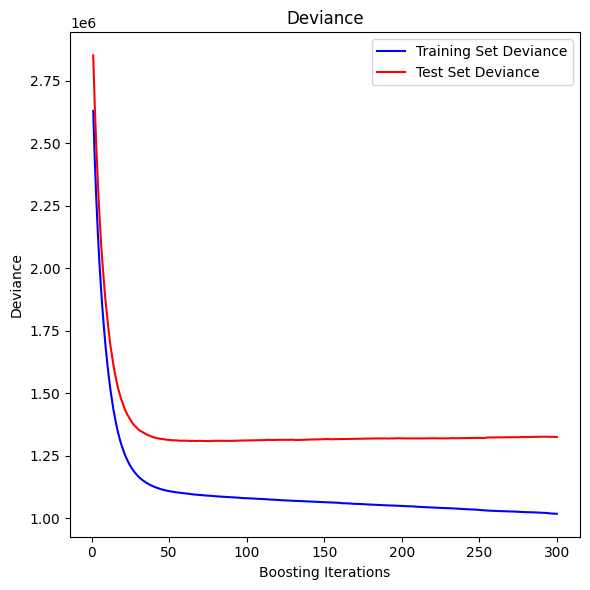

In [86]:
test_score = np.zeros(300, dtype=np.float64)
for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(300) + 1,
    model.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(300) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

__Residual plot__

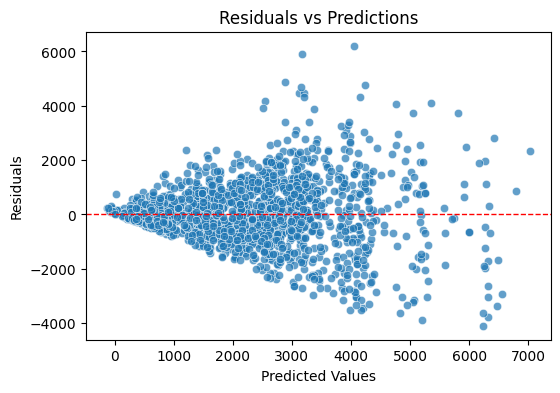

In [87]:
residual = y_test-y_pred
fig = plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residual, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs Predictions")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()
fig.clear()

This looks pretty bad!! I wonder if its the regression. Will a neural network model help?

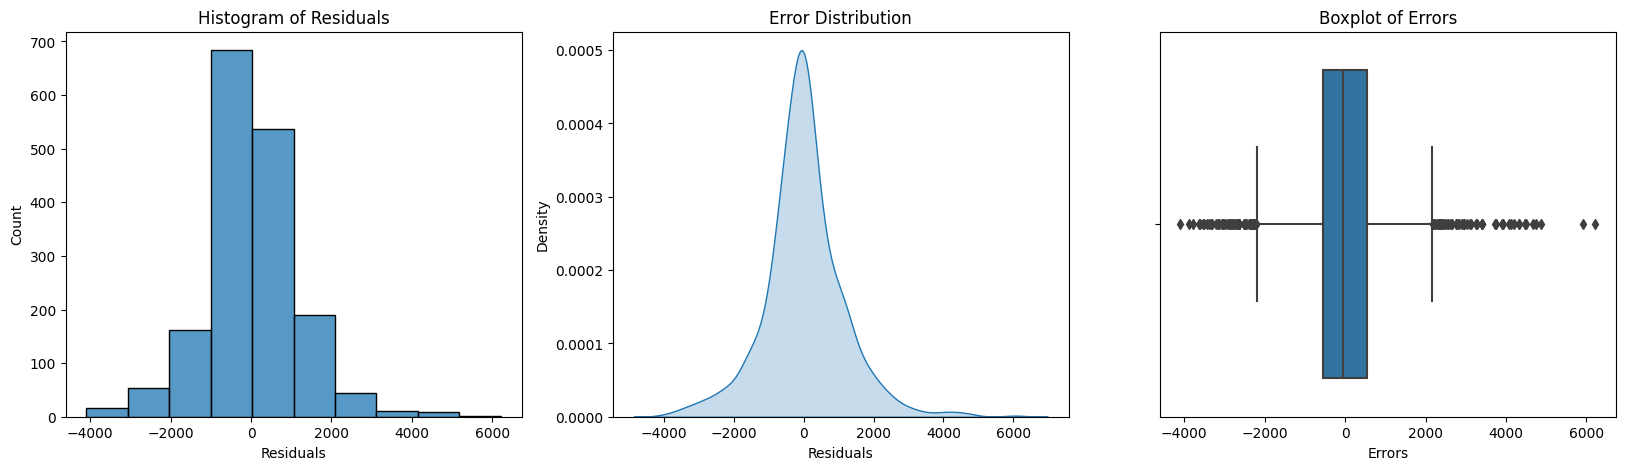

In [88]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.histplot(residual, bins=10, ax=ax[0])
sns.kdeplot(residual, fill=True, ax=ax[1])
sns.boxplot(x=residual, ax=ax[2])
ax[0].set_title("Histogram of Residuals")
ax[1].set_title("Error Distribution")
ax[0].set_xlabel("Residuals")
ax[1].set_xlabel("Residuals")
ax[2].set_title("Boxplot of Errors")
ax[2].set_xlabel("Errors")
plt.show()
fig.clear()

The histogram of error seems to be centered around zero (which is good news!!).

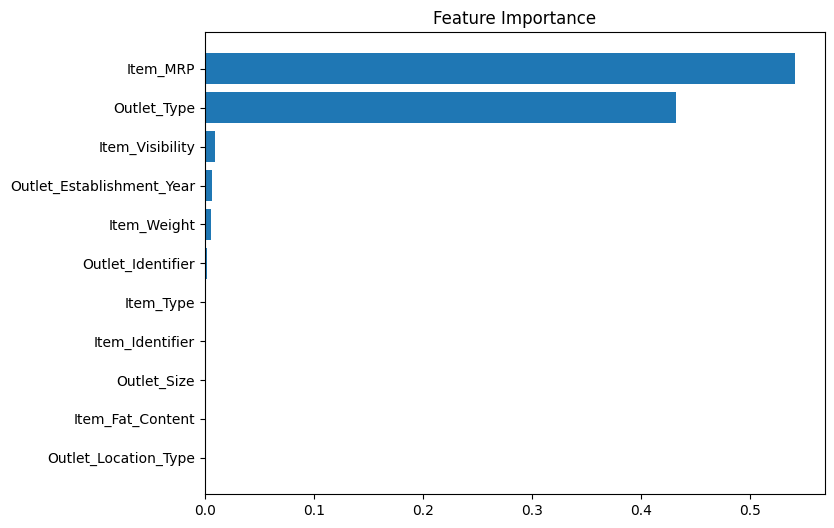

In [89]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()
fig.clear()

### __Learning Curves__

This is going to be quite important as it will tell if the model has high bias or high variance.  
__high bias__ (underfit): Training error _high_, Cross-validation error _high_  
__high variance__ (overfit): Training error _low_, Cross-validation error _high_ (higher than training error)  
__right fit__: _Low_ training and CV error


[[ -637447.70637484  -676542.3849558   -676542.3849558   -676542.3849558
   -676542.3849558   -676542.3849558   -676542.3849558 ]
 [ -899404.45410072  -910166.72091206  -922631.7611011   -922631.7611011
   -922631.7611011   -922631.7611011   -922631.7611011 ]
 [ -982319.93419825 -1007406.65318229  -996668.82695244 -1033414.04376334
  -1007193.13117786 -1007193.13117786 -1007193.13117786]
 [-1024769.9906784  -1032873.3128956  -1036753.86878636 -1047223.58174105
  -1038784.43777843 -1043734.47212283 -1043734.47212283]
 [-1051996.80595136 -1061083.27894068 -1055419.94399725 -1072763.08275121
  -1062635.99776967 -1054113.46344685 -1065543.52670729]]


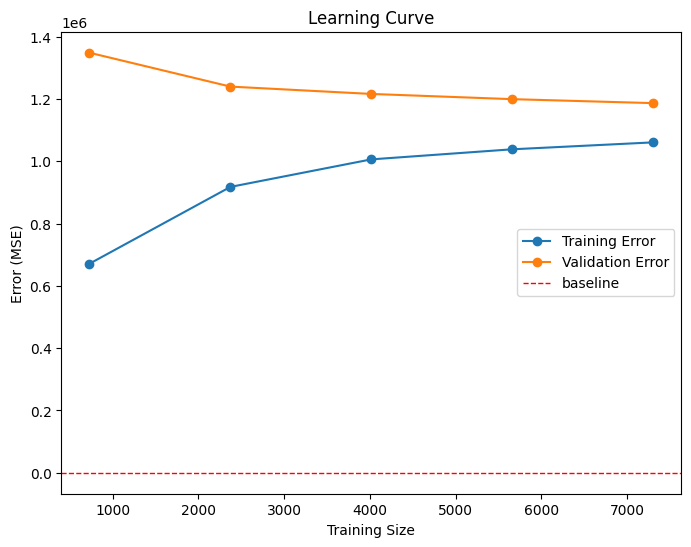

In [113]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=7, scoring='neg_mean_squared_error')
print(train_scores)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Error", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Validation Error", marker='o')
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='baseline')
plt.xlabel("Training Size")
plt.ylabel("Error (MSE)")
plt.title("Learning Curve")
plt.legend()
plt.show()


### You can see that the errors are high in both training and validation. Hence, adding more data will not help. The only thing that will help is to make the model more complex (_Neural Networks_!!)

Let's see the performance by Random Forest classifier, XGB regressor, and Bayesian ridge. If there performance is better than Gradient Boost, then we will perform further analysis!!

### ___Random  forest___

In [109]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 250], 'max_depth': [2, 10, 15]}
grid_search = GridSearchCV(RandomForestRegressor(verbose=1), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best parameters: ", grid_search.best_params_)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Do

[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   10.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   11.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   11.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.3s


Best parameters:  {'max_depth': 10, 'n_estimators': 100}


In [64]:
model = RandomForestRegressor(n_estimators=200, max_depth=10, verbose=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   10.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [65]:
r2 = r2_score(y_test, y_pred)
print('r2: ', r2)
mae = mean_absolute_error(y_test, y_pred)
print('MAE: ', mae)

r2:  0.5622833454082072
MAE:  814.711925311648


### ___XGB Regressor___

In [70]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200, 250], 'max_depth': [6, 10, 15], 'learning_rate':[0.1, 0.3, 0.5]}
grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best parameters: ", grid_search.best_params_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}


In [72]:
model = XGBRegressor(n_estimators=300, max_depth=6, learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [73]:
r2 = r2_score(y_test, y_pred)
print('r2: ', r2)
mae = mean_absolute_error(y_test, y_pred)
print('MAE: ', mae)

r2:  0.5134659625343805
MAE:  860.7382213074123


### ___Bayesian Ridge___

In [93]:
param_grid = {'alpha_1':[1e-6, 1e-1, 10], 'alpha_2':[1e-6, 5e-6, 1e-3], 'lambda_1':[1e-6, 5e-6, 1e-3], 'lambda_2':[1e-6, 1e-1, 10]}
grid_search = GridSearchCV(BayesianRidge(verbose=True), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best parameters: ", grid_search.best_params_)

Convergence after  18  iterations
Convergence after  17  iterations
Convergence after  17  iterations
Convergence after  18  iterations
Convergence after  18  iterations
Convergence after  18  iterations
Convergence after  17  iterations
Convergence after  17  iterations
Convergence after  18  iterations
Convergence after  18  iterations
Convergence after  18  iterations
Convergence after  17  iterations
Convergence after  17  iterations
Convergence after  18  iterations
Convergence after  18  iterations
Convergence after  18  iterations
Convergence after  17  iterations
Convergence after  17  iterations
Convergence after  18  iterations
Convergence after  18  iterations
Convergence after  18  iterations
Convergence after  17  iterations
Convergence after  17  iterations
Convergence after  18  iterations
Convergence after  18  iterations
Convergence after  18  iterations
Convergence after  17  iterations
Convergence after  17  iterations
Convergence after  18  iterations
Convergence af

Convergence after  18  iterations
Convergence after  18  iterations
Convergence after  18  iterations
Convergence after  17  iterations
Convergence after  17  iterations
Convergence after  18  iterations
Convergence after  18  iterations
Convergence after  18  iterations
Convergence after  17  iterations
Convergence after  17  iterations
Convergence after  18  iterations
Convergence after  18  iterations
Convergence after  18  iterations
Convergence after  17  iterations
Convergence after  17  iterations
Convergence after  18  iterations
Convergence after  18  iterations
Convergence after  18  iterations
Convergence after  17  iterations
Convergence after  17  iterations
Convergence after  18  iterations
Convergence after  18  iterations
Convergence after  18  iterations
Convergence after  17  iterations
Convergence after  17  iterations
Convergence after  18  iterations
Convergence after  18  iterations
Convergence after  18  iterations
Convergence after  17  iterations
Convergence af

In [89]:
model = BayesianRidge(alpha_1=10, lambda_2=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [90]:
r2 = r2_score(y_test, y_pred)
print('r2: ', r2)
mae = mean_absolute_error(y_test, y_pred)
print('MAE: ', mae)m

r2:  0.493365093384005
MAE:  933.1866970358476


### None of the other models seem to work better than Gradient Boost regressor. So we will leave it at that. However, as shown by the ___learning curves___, the best way to get even more accurate model is consider neural networks.

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD

In [23]:
model = Sequential([Input(shape=(X_train.shape[1],))])

model.add(Dense(30, activation='relu'))

# Hidden layer
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='relu'))

# Output layer
model.add(Dense(1, activation='linear'))

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,466 (5.73 KB)

 Trainable params: 1,466 (5.73 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae'])

In [119]:
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=64, 
                    verbose=1)

Epoch 1/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 2003.0675 - mae: 2003.0675 - val_loss: 1708.1930 - val_mae: 1708.1930
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1456.8049 - mae: 1456.8049 - val_loss: 1315.7312 - val_mae: 1315.7312
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1262.8575 - mae: 1262.8575 - val_loss: 1303.7023 - val_mae: 1303.7023
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1267.9272 - mae: 1267.9272 - val_loss: 1290.8933 - val_mae: 1290.8933
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1253.3617 - mae: 1253.3617 - val_loss: 1265.7173 - val_mae: 1265.7173
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1229.9851 - mae: 1229.9851 - val_loss: 1229.0355 - val_mae: 1229.0355
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1184.8907 - mae: 1184.8907 - val_loss: 1176.1385 - val_mae: 1176.1385
Epoch 8/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1141.0990 - mae: 1141.0990 - val_loss

In [120]:
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 879.535, Test: 914.620


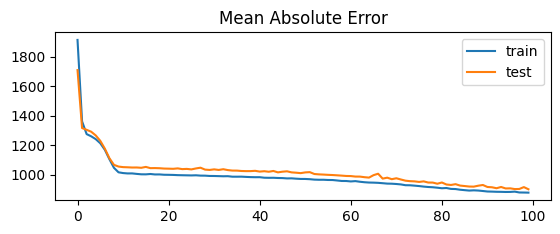

In [122]:
import matplotlib.pyplot as plt
# plot mse during training
fig = plt.figure()
plt.subplot(212)
plt.title('Mean Absolute Error')
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.legend()
plt.show()
fig.clear()

### Seems like the neural network is performing bad in comparision to the Gradient Boosting. Lets see if scaling the numerical features of the data helps reduce the absolute error during training and validation

In [27]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
print(X_train_std.shape)
X_test_std = scaler.transform(X_test)
print(X_test_std.shape)

(6818, 11)
(1705, 11)


In [30]:
history = model.fit(X_train_std, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=64, 
                    verbose=0)

In [33]:
print(model.evaluate(X_train_std, y_train, verbose=1))
_, train_mse = model.evaluate(X_train_std, y_train, verbose=0)
_, test_mse = model.evaluate(X_test_std, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 724.3480 - mae: 724.3480
[732.5921630859375, 732.5921630859375]
Train: 732.592, Test: 806.836


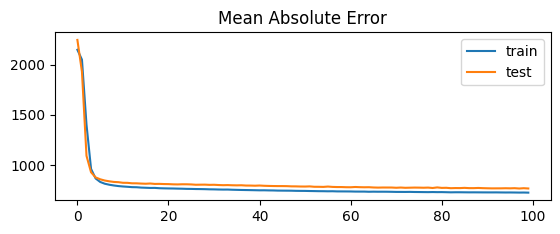

In [34]:
fig = plt.figure()
plt.subplot(212)
plt.title('Mean Absolute Error')
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.legend()
plt.show()
fig.clear()

### Yep, feature scaling makes the model much better. However, the performance is still similar to GB and not better!!